In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from mlscorecheck.auc import acc_from_auc

In [8]:
results = []
for auc in np.linspace(0.5, 1.0, 20):
    scores = {
        'auc': auc
    }
    for (p, n) in [(100, 900), (200, 800), (300, 700), (400, 600), (500, 500)]:
        try:
            interval = acc_from_auc(
                scores=scores,
                eps=1e-4,
                p=p,
                n=n,
                upper='max'
            )
            results.append((auc, interval[0], interval[1], interval[1] - interval[0], p, n, 'max'))
        except:
            pass
        try:
            interval = acc_from_auc(
                scores=scores,
                eps=1e-4,
                p=p,
                n=n,
                upper='cmax'
            )
            results.append((auc, interval[0], interval[1], interval[1] - interval[0], p, n, 'cmax'))
        except:
            pass

In [9]:
data = pd.DataFrame(results, columns=['auc', 'int0', 'int1', 'diff', 'p', 'n', 'label'])

In [10]:
data[20:]

,auc,int0,int1,diff,p,n,label
20,0.736842,0.497280,0.894777,0.397497,400,600,max
21,0.736842,0.497280,0.875357,0.378077,400,600,cmax
22,0.736842,0.486913,0.868471,0.381558,500,500,max
23,0.736842,0.486913,0.844196,0.357283,500,500,cmax
24,0.763158,0.523068,0.905303,0.382235,400,600,max
...,...,...,...,...,...,...,...
93,1.000000,0.990835,1.000000,0.009165,300,700,cmax
94,1.000000,0.990202,1.000000,0.009798,400,600,max
95,1.000000,0.990202,1.000000,0.009798,400,600,cmax
96,1.000000,0.990000,1.000000,0.010000,500,500,max


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


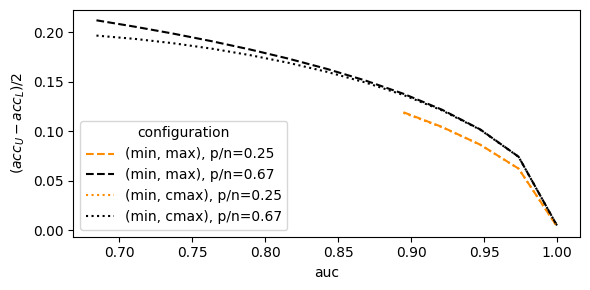

In [15]:
plt.figure(figsize=(6, 3))

tmp0 = data[(data['p'] == 200) & (data['n'] == 800) & (data['label'] == 'max')]
plt.plot(tmp0['auc'], tmp0['diff']/2, label=f'(min, max), p/n={200/800:.2f}', color='darkorange', ls='--')

tmp0 = data[(data['p'] == 400) & (data['n'] == 600) & (data['label'] == 'max')]
plt.plot(tmp0['auc'], tmp0['diff']/2, label=f'(min, max), p/n={400/600:.2f}', color='black', ls='--')

tmp0 = data[(data['p'] == 200) & (data['n'] == 800) & (data['label'] == 'cmax')]
plt.plot(tmp0['auc'], tmp0['diff']/2, label=f'(min, cmax), p/n={200/800:.2f}', color='darkorange', ls=':')

tmp0 = data[(data['p'] == 400) & (data['n'] == 600) & (data['label'] == 'cmax')]
plt.plot(tmp0['auc'], tmp0['diff']/2, label=f'(min, cmax), p/n={400/600:.2f}', color='black', ls=':')

plt.xlabel('auc')
plt.ylabel(r'$(acc_U - acc_L) / 2$')

plt.legend(title='configuration')

plt.tight_layout()
plt.savefig('p5.eps')
plt.show()